In [ ]:
# импортируем библиотеки
import numpy as np
rng = np.random.default_rng()
from scipy.stats import norm

In [24]:
# предположим у нас есть данные с неизвестным распределением
dist = norm(loc=2, scale=4)
data = dist.rvs(size=100, random_state=rng)
data

array([ 3.69826112,  0.83064604,  0.58719485,  0.92961043,  8.37686557,
       -3.15107453,  7.33649307,  1.84718157,  4.45753617,  1.25917884,
       -1.72459571,  3.11068676, -3.5349498 , -1.38369916,  1.04463612,
       -1.70825435,  3.65682486, -0.37269511,  2.62452648,  0.65857676,
        3.82010411, -3.57494702,  9.47403348, -9.75307768,  0.51759737,
        1.33324771,  3.34405837, -1.60670273, -0.48371187,  6.86696611,
        4.00353545, -3.37423097, -0.85290016,  7.13675917,  1.48378341,
        1.9629565 ,  4.89160176,  5.09322854,  1.87236421,  2.73489477,
        1.29651578,  6.94535628,  0.65718189, -2.12511153,  9.48237214,
        0.91272043,  4.25665031,  7.15906629,  1.49047262,  5.63657128,
        1.22041493,  1.49867949,  5.26013845, -4.34524397,  0.67690804,
        3.42732504,  6.49426036,  1.3416929 ,  7.62420593, -0.84975263,
        1.48965407,  5.87077044,  7.33727585,  4.88946749, -0.15537168,
       -0.517219  ,  1.65548439, -3.49026742,  4.5595011 ,  6.64

In [25]:
# посмотрим реальное значение для стандартного отклонения
std_true = dist.std()    
print(std_true)

# посмотрим значение для стандартного отклонения для нашего стреза данных
std_sample = np.std(data) 
print(std_sample)

4.0
3.6634888985705354


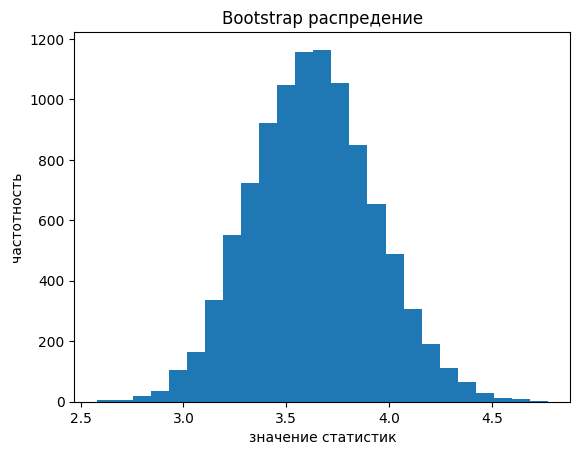

In [26]:
import matplotlib.pyplot as plt
from scipy.stats import bootstrap
data = (data,)
res = bootstrap(data, np.std, confidence_level=0.9, random_state=rng)

fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap распредение')
ax.set_xlabel('значение статистики')
ax.set_ylabel('частотность')
plt.show()

In [28]:
# Стандартная ошибка количественно определяет изменчивость.
x = res.standard_error
print(x)

0.29828792723570347


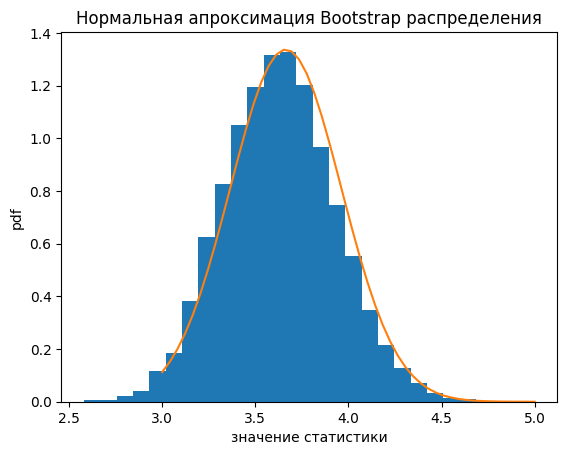

In [30]:
# Bootstrap-распределение статистики часто является приблизительно к нормальному с масштабом, равным стандартной ошибке.
x = np.linspace(3, 5)

# функция плотности вероятности
pdf = norm.pdf(x, loc=std_sample, scale=res.standard_error)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25, density=True)
ax.plot(x, pdf)
ax.set_title('Нормальная апроксимация Bootstrap распределения')
ax.set_xlabel('значение статистики')
ax.set_ylabel('pdf')
plt.show()

In [31]:
# Это говорит о том, что мы могли бы построить 90% доверительный интервал для статистики на основе квантилей этого нормального распределения.
norm.interval(0.9, loc=std_sample, scale=res.standard_error)

(3.1728489195810514, 4.154128877560019)

In [32]:
# доверительный интервал для Bootstrap распределения
print(res.confidence_interval)

ConfidenceInterval(low=3.2522043265169316, high=4.279269676795056)


In [33]:
# Если мы произведем выборку из исходного распределения 1000 раз и сформируем доверительный интервал начальной загрузки для каждой выборки, 
# доверительный интервал будет содержать истинное значение статистики примерно в 90% случаев.
n_trials = 1000
ci_contains_true_std = 0
for i in range(n_trials):
    data = (dist.rvs(size=100, random_state=rng),)
    ci = bootstrap(data, np.std, confidence_level=0.9, n_resamples=1000, random_state=rng).confidence_interval
    if ci[0] < std_true < ci[1]:
        ci_contains_true_std += 1
print(ci_contains_true_std)

884


In [34]:
# Вместо того, чтобы писать цикл, мы также можем определить доверительные интервалы для всех 1000 выборок сразу.
data = (dist.rvs(size=(n_trials, 100), random_state=rng),)
res = bootstrap(data, np.std, axis=-1, confidence_level=0.9, n_resamples=1000, random_state=rng)
ci_l, ci_u = res.confidence_interval

In [36]:
# Здесь ci_l и ci_u содержат доверительный интервал для каждого из n_trials = 1000 .
print(ci_l[995:])
print(ci_u[995:])

[3.45405212 3.63348535 3.53924459 3.83652104 3.30212746]
[4.20797253 4.45609011 4.4157593  4.6376695  4.16767742]


In [37]:
print(np.sum((ci_l < std_true) & (std_true < ci_u)))

875
